In [44]:
import requests

raw_data = requests.get("https://www.delino.com/restaurant/search/?lat=31.835143&lng=54.374086&sort=order&offset=0&limit=100")

In [45]:
raw_data

<Response [200]>

In [46]:
data = raw_data.json()

In [47]:
len(data)

5

In [48]:
len(data["result"])

58

In [49]:
import pandas as pd
pd. set_option('display.max_rows', 500)
pd. set_option('display.max_columns', 500)
df = pd.DataFrame(data["result"])
# df

In [50]:
df.shape

(58, 39)

In [51]:
df.dtypes

enableOrdering                 bool
id                           object
name                         object
exactName                    object
categoryName                 object
domain                       object
compactMenu                    bool
branch                       object
address                      object
fullAddress                  object
logo                         object
cover                        object
discount                    float64
mealTime                     object
rate                        float64
rateCount                   float64
reviewCount                   int64
lat                         float64
lng                         float64
online                         bool
deliverArea                  object
deliveryTime                 object
colorCover                   object
offlineText                  object
searchTag                    object
restaurantActivationDate     object
foods                        object
performanceRate             

In [52]:
df.sort_values("orderCount",ascending=False,inplace=True)
df.head()

,enableOrdering,id,name,exactName,categoryName,domain,compactMenu,branch,address,fullAddress,logo,cover,discount,mealTime,rate,rateCount,reviewCount,lat,lng,online,deliverArea,deliveryTime,colorCover,offlineText,searchTag,restaurantActivationDate,foods,performanceRate,company,orderCount,deliveryPrice,priceLevel,deliveryDuration,cookingDuration,newDiscount,cityId,areaId,favourite,hasHalfReady
22,True,2d180539-1ac8-48f7-b1bf-dcc4befc74f5,فست فود کرنوپیچ,کرنوپیچ,دسر و پیش غذا,kornopich,False,,صفاییه,یزد، صفاییه، بلوار دانشگاه، خیابان مجدالعلما، ...,https://static.delino.com/Image/Default/logo/3...,https://static.delino.com/Image/Restaurant/Cov...,0.0,شروع سفارش گیری از 19:30 امروز,4.49,1518.0,165,31.840357,54.366723,False,None,25 تا 55 دقیقه,#f8da94,خارج از ساعت سفارش گیری,None,2018-10-13T19:37:06,None,95,None,8987,None,0,30,25,0,1012.0,0.0,False,False
0,True,bd40ec70-574e-46fc-a471-7bc06d334d10,ساندویچ ممتاز,ممتاز,نوشیدنی,momtaz,False,,میدان فرهنگ (نعل اسبی),میدان فرهنگ، مجتمع فراز، ساندویچ ممتاز,https://static.delino.com/Image/Default/logo/h...,https://static.delino.com/Image/Restaurant/Cov...,0.0,,4.34,961.0,17,31.845644,54.359057,True,None,45 تا 55 دقیقه,#25110A,None,None,2019-10-15T14:03:04,None,91,None,6327,None,0,10,45,0,1012.0,0.0,False,False
1,True,118796ee-83f8-4e56-8949-29ea8247529e,مجموعه رستوران های عمارت وکیل,عمارت وکیل,نوشیدنی,emarat_vakil,False,,میدان ابوذر,یزد، میدان ابوذر، کوچه سنبل، جنب بانک صادرات,https://static.delino.com/Image/Default/logo/j...,https://static.delino.com/Image/Restaurant/Cov...,0.0,,4.28,516.0,81,31.843851,54.385280,True,None,40 تا 55 دقیقه,#25110A,None,None,2018-11-27T11:51:41,None,95,None,3201,None,0,15,40,0,1012.0,0.0,False,False
2,True,a80289cd-11da-4327-8d6d-215ac09d2b91,فست فود 27,27,نوشیدنی,27-fastfood,True,,صفاییه,صفاییه، خیابان منتظر فرج,https://static.delino.com/Image/Default/logo/m...,https://static.delino.com/Image/Restaurant/Cov...,0.0,,4.68,599.0,208,31.847387,54.372196,True,None,20 تا 50 دقیقه,#25110A,None,None,2018-10-19T18:41:37,None,91,None,2800,None,0,30,20,0,1012.0,0.0,False,False
3,True,8cdce8fd-f202-4349-b343-5053426574c1,فست فود ونک,ونک,نوشیدنی,vanak,True,,خیابان آذر یزدی,یزد، خیابان آذر یزدی,https://static.delino.com/Image/Default/logo/0...,https://static.delino.com/Image/Restaurant/Cov...,0.0,,4.44,455.0,105,31.880555,54.346629,True,None,30 تا 55 دقیقه,#ffff00,None,None,2020-02-12T13:31:55,None,83,None,2528,None,0,25,30,0,1012.0,0.0,False,False


In [60]:
dfToBarChart = df[["exactName","orderCount","rate","rateCount","performanceRate"]].sort_values("orderCount",ascending=False)
dfToBarChart = dfToBarChart.head(5)
dfToBarChart

,exactName,orderCount,rate,rateCount,performanceRate
14,مربع,152,4.14,28.0,0
15,مرغ سوخاری کنتاکی,103,5.00,12.0,0
38,درباری,93,4.73,44.0,0
39,کافه رستوران‌ زنجیره‌ای سلاطین (خش‌خوران),49,4.00,6.0,0
40,ریزوتو,42,4.07,15.0,0
41,عمارت خانه پدری,41,3.00,10.0,0
42,مستر جگر,38,5.00,8.0,0
43,پارسیس هتل صفاییه,36,4.25,8.0,0
16,ساندویچ برمودا,28,3.50,4.0,0
44,دنیز,27,0.00,0.0,0


In [54]:
resturants = dfToBarChart.exactName.values.tolist()
rates = dfToBarChart.rate.values.tolist()
orderCounts = dfToBarChart.rateCount.values.tolist()

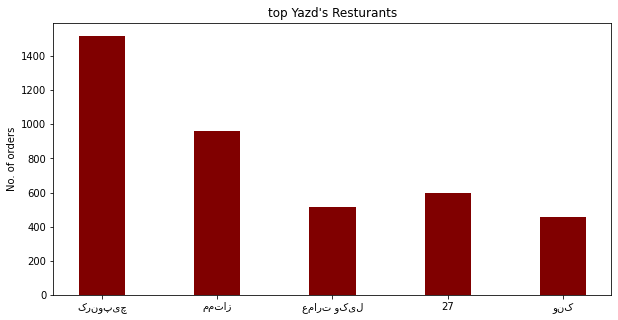

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(resturants, orderCounts, color ='maroon',
        width = 0.4)
 
# plt.xlabel("Courses offered")
plt.ylabel("No. of orders")
plt.title("top Yazd's Resturants")
plt.show()